<a href="https://colab.research.google.com/github/sahilwasta28/PRODIGY_DS_04/blob/main/PRODIGY_DS_TWITTER_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the required Datasets

In [3]:
import pandas as pd

# Loading the training and validation datasets
train_df = pd.read_csv('twitter_training.csv')
val_df = pd.read_csv('twitter_validation.csv')

print("Training Dataset:")
print(train_df.head())
print(train_df.info())

print("\nValidation Dataset:")
print(val_df.head())
print(val_df.info())


Training Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-nu

In [4]:
import warnings

warnings.filterwarnings('ignore')

### Printing some data from the Datasets

In [5]:
print(train_df.columns)
print(val_df.columns)
print("Training Dataset:")
print(train_df.head())
print(train_df.info())

print("\nValidation Dataset:")
print(val_df.head())
print(val_df.info())


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')
Training Dataset:
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can 

### Pie Chart (Visualization)

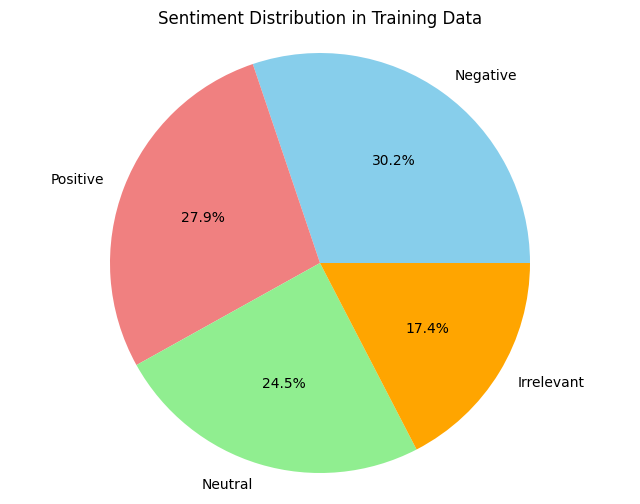

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the training dataset
train_df = pd.read_csv('twitter_training.csv')

try:

    sentiment_counts = train_df.iloc[:, 2].value_counts()


    sentiment_counts = sentiment_counts[sentiment_counts.index != 'irrelevant']

    # Plotting a pie chart for sentiment distribution
    plt.figure(figsize=(8, 6))
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']  # Assigning colors including a different color for 'irrelevant'
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
    plt.title('Sentiment Distribution in Training Data')
    plt.axis('equal')
    plt.show()

except IndexError:
    print("Index 2 is out of range. Verify the structure of dataset.")
except KeyError:
    print("Sentiment column not found. Verify the structure of dataset.")




Here, It demonstrates that **negative sentiment has the highest frequency** in the training dataset when 'irrelevant' sentiments are excluded. This insight is crucial for understanding public opinion and attitudes towards specific topics or brands in social media. A high proportion of negative sentiment could indicate dissatisfaction or criticism related to the topic or brand being analyzed. This finding suggests that there may be significant challenges or concerns associated with the subject matter, which could impact reputation, customer satisfaction, or public perception.

## Preprocessing the Data

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text_column):
    # Checking and handling missing values
    text_column = text_column.fillna('')  # Replacing NaN with empty string

    text_column = text_column.astype(str)  # Ensuring all values are strings

    text_column = text_column.str.lower()  # Converting text to lowercase
    text_column = text_column.str.translate(str.maketrans('', '', string.punctuation))  # Removing punctuation
    tokens = text_column.apply(word_tokenize)  # Tokenize text
    tokens = tokens.apply(lambda x: [token for token in x if token not in stopwords.words('english')])  # Removing stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = tokens.apply(lambda x: [lemmatizer.lemmatize(token) for token in x])  # Lemmatizing tokens
    return tokens.apply(lambda x: " ".join(x))

# Applying preprocessing assuming text is in the last column
train_df['clean_text'] = preprocess_text(train_df.iloc[:, -1])
val_df['clean_text'] = preprocess_text(val_df.iloc[:, -1])






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Building a Classifier (Logistic Regression Classifier)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Define the model pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('clf', LogisticRegression()),  # Logistic Regression classifier
])

# Training the model
model.fit(train_df['clean_text'], train_df.iloc[:, 2])

# Predictions on validation set
val_predictions = model.predict(val_df['clean_text'])

# Evaluating the model
accuracy = accuracy_score(val_df.iloc[:, 2], val_predictions)
print(f'Accuracy: {accuracy:.4f}')

# Printing classification report for detailed evaluation
print(classification_report(val_df.iloc[:, 2], val_predictions))




Accuracy: 0.6476
              precision    recall  f1-score   support

  Irrelevant       0.60      0.47      0.52       171
    Negative       0.62      0.76      0.68       266
     Neutral       0.71      0.59      0.64       285
    Positive       0.65      0.71      0.68       277

    accuracy                           0.65       999
   macro avg       0.64      0.63      0.63       999
weighted avg       0.65      0.65      0.64       999



### Printing predicted & actual labels

In [9]:
print(val_predictions[:10])  # Printing first few predicted labels
print(val_df.iloc[:, 0].head(10))  # Printing first few actual labels


['Neutral' 'Negative' 'Negative' 'Neutral' 'Negative' 'Positive'
 'Irrelevant' 'Positive' 'Negative' 'Negative']
0      352
1     8312
2     4371
3     4433
4     6273
5     7925
6    11332
7     1107
8     2069
9     3185
Name: 3364, dtype: int64


In [10]:
val_df.iloc[:, 0] = val_df.iloc[:, 0].astype(str)


In [11]:
print(val_df.iloc[:, 0].apply(type).value_counts())


3364
<class 'str'>    999
Name: count, dtype: int64


In [12]:
sample_predictions = val_predictions[:10]
sample_actual = val_df.iloc[:, 0].head(10)
print(sample_predictions)
print(sample_actual)


['Neutral' 'Negative' 'Negative' 'Neutral' 'Negative' 'Positive'
 'Irrelevant' 'Positive' 'Negative' 'Negative']
0      352
1     8312
2     4371
3     4433
4     6273
5     7925
6    11332
7     1107
8     2069
9     3185
Name: 3364, dtype: object


## Visualization (Heatmap)

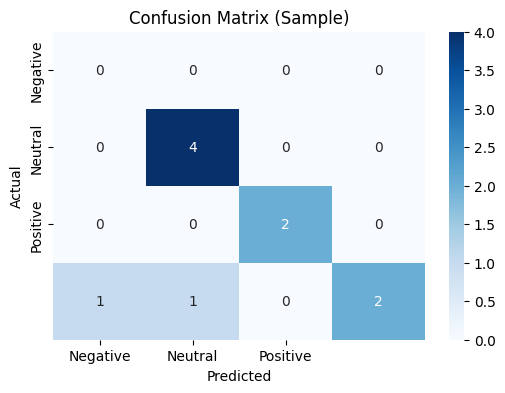

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


sample_predictions = val_predictions[:10]
sample_actuals = val_df.iloc[:, 2].head(10)

# Computing confusion matrix for the required sample
conf_matrix = confusion_matrix(sample_actuals, sample_predictions)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Sample)')
plt.show()






